In [1]:
from main import *

## Gun Modelv2 non sym

OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_3_POD_13_1e-6/Data/
Opening files from this path =  OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_3_POD_13_1e-6/Data/


/Users/paulledger/Coding/Rodrigues_Angles/src/Fmeasure.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_Angles/src/Commeasure.py:37: RuntimeWarning: divide by zero encountered in scalar divide
  Comexactconst[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation)


[8.03246964e-04 8.04262448e-04 8.17497559e-04 8.74754983e-04
 2.58413810e-03 9.30646312e-01 1.00291056e+00 1.06560073e+00
 1.10336294e+00 1.11310725e+00 1.14169542e+00 1.23268495e+00
 1.34814878e+00]
[1.41421333 1.41421333 1.41421333 1.41421329 1.4142112  1.06484621
 0.99708094 0.92978228 0.8846413  0.8723487  0.83458467 0.69317229
 0.42719419]


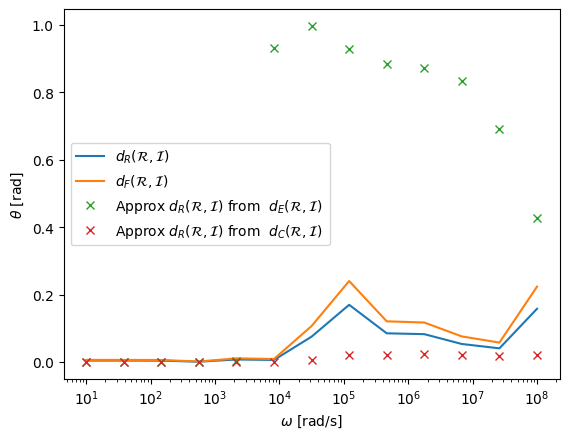

Computing F measure Tilde
[1.41421309 1.41421308 1.41421293 1.41420871 1.36920202 0.48454556
 0.18233899 0.03574303 0.02053448 0.01912941 0.01079967 0.02118245
 0.07968989]
[1.15652419e-03 1.16817777e-03 1.34190630e-03 3.70581797e-03
 3.53957395e-01 1.32861417e+00 1.40240953e+00 1.41376180e+00
 1.41406447e+00 1.41408418e+00 1.41417233e+00 1.41405492e+00
 1.41196654e+00]


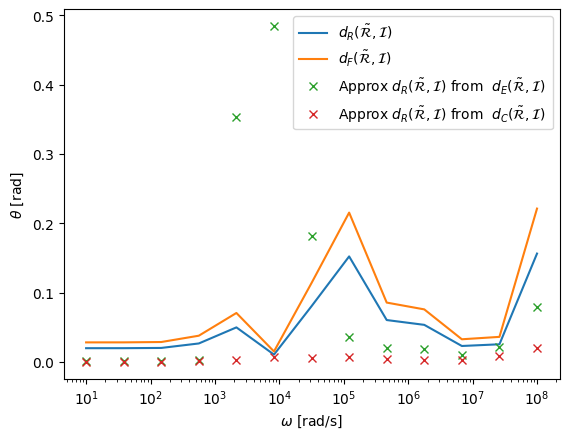

[1.41421309 1.41421308 1.41421297 1.41421154 1.41420716 0.92092833
 0.49504829 0.26678015 0.24056967 0.23396304 0.2179224  0.17909964
 0.11049567]
[1.15630206e-03 1.16492040e-03 1.29245785e-03 2.39366096e-03
 4.25654294e-03 1.07326186e+00 1.32473665e+00 1.38882265e+00
 1.39360189e+00 1.39472624e+00 1.39732238e+00 1.40282690e+00
 1.40989032e+00]


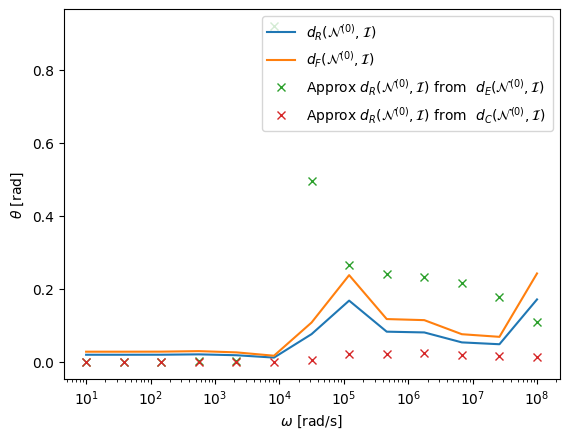

[0.00056951 0.00055992 0.00045208 0.0009004  0.00226524 0.00287008
 0.00280519 0.00362576 0.00466109 0.00547997 0.00589866 0.00602401
 0.00608097]
[1.41421345 1.41421345 1.41421349 1.41421328 1.41421175 1.41421065
 1.41421078 1.41420891 1.41420588 1.41420295 1.41420126 1.41420073
 1.41420049]


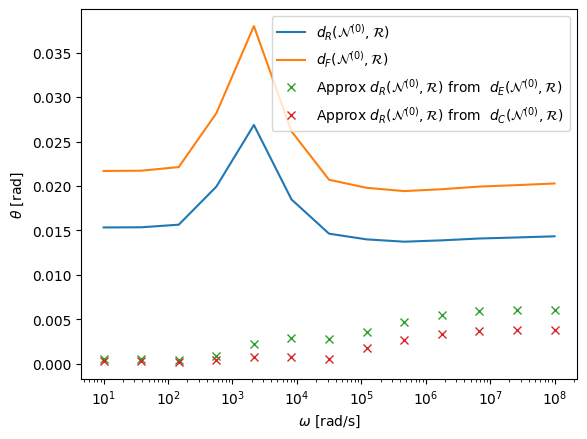

[1.41421356 1.41421356 1.41421356 1.41421336 1.41139185 1.39570261
 1.39292044 1.39294609 1.39315144 1.39326819 1.39333431 1.39341427
 1.39348366]
[2.48216543e-07 3.54583417e-06 3.43339860e-05 7.49703796e-04
 8.92919719e-02 2.28066250e-01 2.44484431e-01 2.44338279e-01
 2.43164670e-01 2.42494819e-01 2.42114619e-01 2.41654040e-01
 2.41253591e-01]


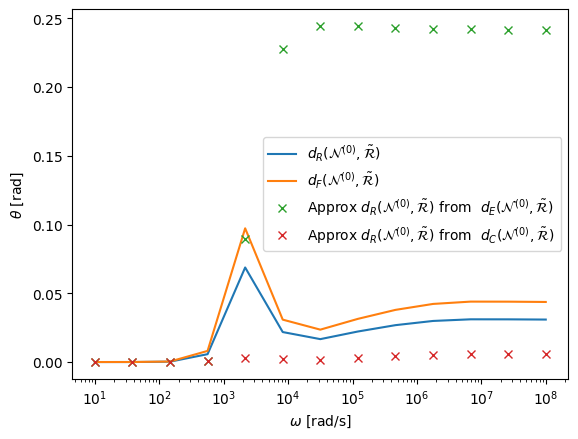

Opening files from this path =  OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_3_POD_13_1e-6/Data/
[8.03246987e-04 8.03746115e-04 8.04102908e-04 8.04334279e-04
 8.04457115e-04 8.04489104e-04 8.04451203e-04 8.04369904e-04
 8.04280666e-04 8.04232131e-04 8.04291795e-04 8.04552818e-04
 8.05142080e-04 8.06228493e-04 8.08029715e-04 8.10813071e-04
 8.14883056e-04 8.20543662e-04 8.28019373e-04 8.37319183e-04
 8.48042956e-04 8.59173466e-04 8.68984082e-04 8.75315947e-04
 8.76595285e-04 8.74008430e-04 8.75144555e-04 8.98498388e-04
 9.74321951e-04 1.13311810e-03 1.38659678e-03 1.72440932e-03
 2.12822130e-03 2.58413711e-03 3.08671372e-03 3.65056283e-03
 2.06796409e-01 5.63774192e-01 7.23528310e-01 8.20451716e-01
 8.82595892e-01 9.22976805e-01 9.49321742e-01 9.66663292e-01
 9.78290306e-01 9.86262392e-01 9.91830200e-01 9.95805645e-01
 9.98829855e-01 1.00150972e+00 1.00445182e+00 1.00824218e+00
 1.01338612e+00 1.02014415e+00 1.02837137e+00 1.03786475e+00
 1.04

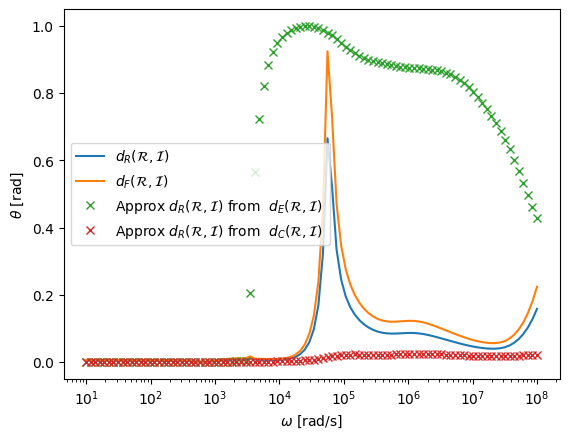

Computing F measure Tilde
[1.41421309 1.41421309 1.41421309 1.41421309 1.41421309 1.41421309
 1.41421309 1.41421308 1.41421308 1.41421308 1.41421307 1.41421306
 1.41421305 1.41421304 1.41421302 1.41421299 1.41421295 1.41421289
 1.41421281 1.41421268 1.41421249 1.41421219 1.41421174 1.41421103
 1.41420993 1.4142082  1.41420538 1.41420049 1.41419094 1.4141679
 1.41407625 1.41127443 1.3966188  1.36920201 1.32252111 1.24776626
 1.12695232 0.95634627 0.80924483 0.68575726 0.58437281 0.50239194
 0.43650098 0.38330971 0.33974171 0.30324109 0.27181669 0.24396387
 0.21849725 0.19432272 0.17017686 0.14436654 0.11479214 0.08228718
 0.05938161 0.04858254 0.04261753 0.03839947 0.03491741 0.03184197
 0.02909259 0.02668048 0.02464212 0.02300921 0.0217943  0.02098361
 0.02053453 0.02037742 0.02042065 0.02055786 0.02067771 0.02067681
 0.02047489 0.02002843 0.0193369  0.01843743 0.01738925 0.01625566
 0.0150923  0.01394571 0.01286044 0.0118892  0.01110024 0.01057626
 0.01040114 0.01063872 0.01131987 0.0

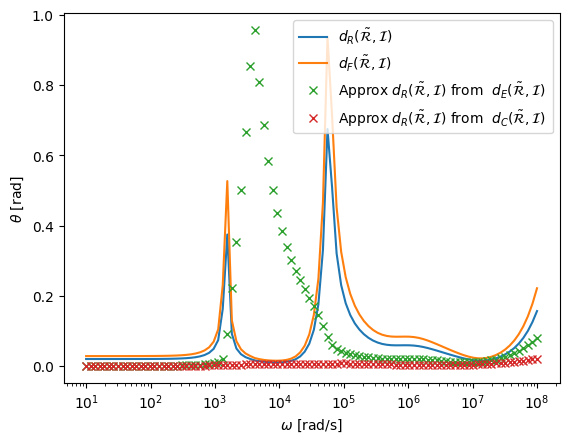

[1.41421309 1.41421309 1.41421309 1.41421309 1.41421309 1.41421309
 1.41421309 1.41421309 1.41421308 1.41421308 1.41421308 1.41421307
 1.41421306 1.41421305 1.41421304 1.41421302 1.41421299 1.41421295
 1.41421289 1.41421281 1.4142127  1.41421255 1.41421235 1.4142121
 1.4142118  1.41421144 1.41421103 1.41421055 1.41421001 1.41420941
 1.41420879 1.41420819 1.41420764 1.41420716 1.41420668 1.41420608
 1.39739392 1.28008756 1.17708124 1.08684321 1.00758753 0.9373295
 0.87400628 0.81567688 0.7607698  0.70827862 0.65778313 0.60923953
 0.56260273 0.5174218  0.47254538 0.42609143 0.37642271 0.32848471
 0.29965308 0.28633543 0.2779351  0.27121753 0.26539546 0.26030502
 0.25591356 0.2521769  0.24901768 0.24634522 0.24407965 0.24216503
 0.24056969 0.2392763  0.23826567 0.23749896 0.23690565 0.23638483
 0.23582296 0.2351217  0.23422169 0.23310882 0.23179992 0.23031709
 0.22866421 0.22681505 0.22471492 0.22229364 0.21948551 0.21625062
 0.21258923 0.20854084 0.20416474 0.19950857 0.19457935 0.189331

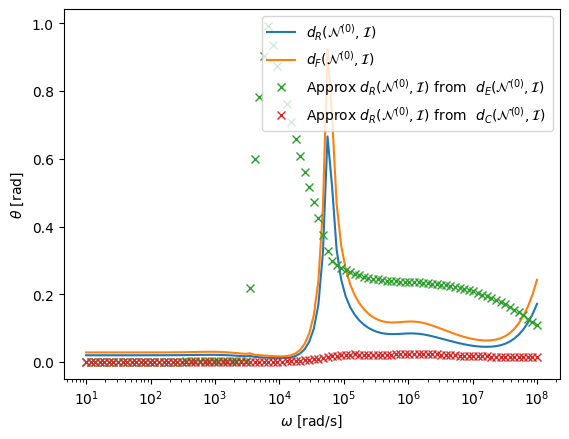

[0.00056951 0.00056964 0.00056953 0.00056916 0.00056847 0.00056741
 0.00056587 0.00056373 0.0005608  0.00055686 0.00055158 0.00054457
 0.00053533 0.00052329 0.00050782 0.00048841 0.00046501 0.00043872
 0.00041317 0.00039649 0.00040213 0.00044414 0.00052749 0.00064552
 0.00078639 0.00093932 0.00109789 0.00126084 0.00143007 0.00160649
 0.00178666 0.00196264 0.00212471 0.00226524 0.00238164 0.00247691
 0.00255749 0.00262996 0.00269824 0.00276245 0.00281906 0.00286215
 0.00288588 0.00288771 0.00287051 0.00284226 0.00281318 0.00279228
 0.00278522 0.00279438 0.00282014 0.00286256 0.00292232 0.00300087
 0.00309961 0.00321866 0.00335596 0.00350708 0.00366575 0.00382486
 0.00397767 0.00411914 0.00424689 0.00436147 0.00446587 0.00456433
 0.00466109 0.00475924 0.00486016 0.00496355 0.00506794 0.00517142
 0.00527209 0.00536829 0.00545852 0.00554137 0.0056157  0.00568077
 0.00573654 0.00578364 0.00582325 0.00585679 0.00588564 0.00591088
 0.00593322 0.005953   0.00597034 0.00598531 0.00599804 0.0060

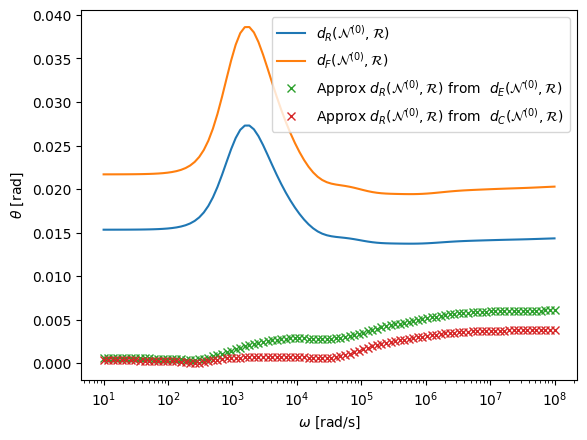

[1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356 1.41421356
 1.41421356 1.41421356 1.41421356 1.41421356 1.41421355 1.41421353
 1.41421346 1.41421332 1.41421303 1.41421249 1.41421143 1.41420895
 1.41419953 1.41393783 1.41285933 1.41139185 1.4095579  1.40742405
 1.40512147 1.40281631 1.40066491 1.39877865 1.39721133 1.39596645
 1.39501451 1.39431062 1.393807   1.39345916 1.39322811 1.39308091
 1.39299088 1.39293779 1.39290744 1.39289082 1.39288285 1.39288117
 1.392885   1.39289428 1.39290897 1.39292863 1.39295231 1.39297857
 1.39300586 1.39303287 1.39305882 1.39308348 1.39310699 1.39312961
 1.39315144 1.3931723  1.39319176 1.39320931 1.39322458 1.39323751
 1.39324839 1.39325773 1.39326617 1.3932742  1.39328215 1.39329009
 1.39329799 1.39330581 1.3933136  1.39332155 1.39332991 1.3933389
 1.3933486  1.39335889 1.39336944 1.39337987 1.39338985 1.39339

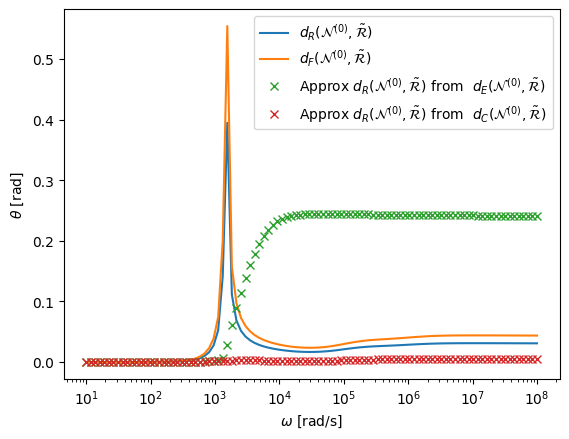

In [2]:

#DirList=["OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_4_POD_13_1e-6/Data/"]
#    "OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_4_POD_13_1e-6/Data/"]
#DirList=["OCC_Gun_modelv2_nonsym_al/al_0.01_mu_1,1_sig_3.5e7,3.5e7/1e1-1e8_40_el_26657_ord_2_POD_13_1e-6/Data/"]

#DirList=["OCC_Gun_modelv2_small/al_0.001_mu_1,100_sig_3.5e7,4.5e6/1e1-1e8_40_el_25735_ord_5_POD_13_1e-6/Data/"]

SaveRIList=[]
SaveRtilde=[]

MaxOmega=1e8
p=3
mu=20

#directory="OCC_Gun_modelv2_small/al_0.001_mu_1,100_sig_3.5e7,4.5e6/1e1-1e8_40_el_25735_ord_5_POD_13_1e-6/Data/"

directory="OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,"+str(mu)+"_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_"+str(p)+"_POD_13_1e-6/Data/"
#directory="OCC_Gun_modelv2_nonsym_StainSt_ep_1e-10_tol_1e-12/al_0.01_mu_1,"+str(mu)+"_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_"+str(p)+"_POD_13_1e-6/Data/"


print(directory)
RIResultsFull,RtildeIResultsFull, N0IResultsFull, N0RResultsFull, N0RtildeResultsFull=main(directory,MaxOmega,Figures="On",FullRom="Full")    
RIResults,RtildeIResults, N0IResults, N0RResults, N0RtildeResults=main(directory,MaxOmega,Figures="On",FullRom="Rom")    

SaveRIList=[]
SaveRtilde=[]



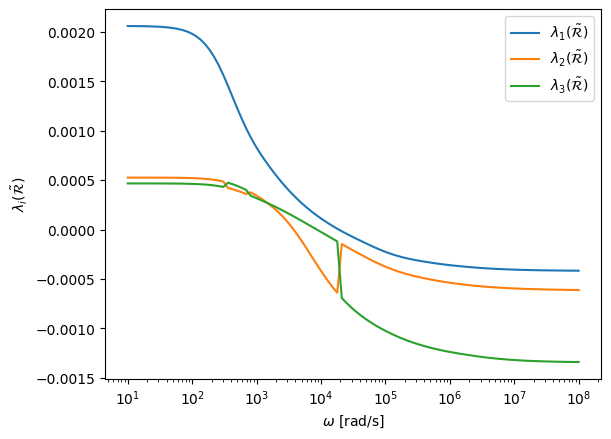

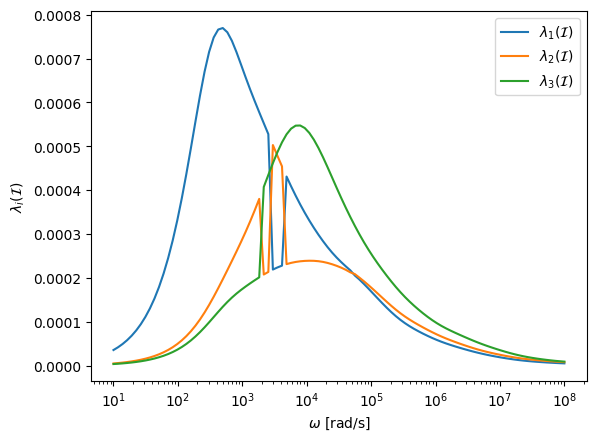

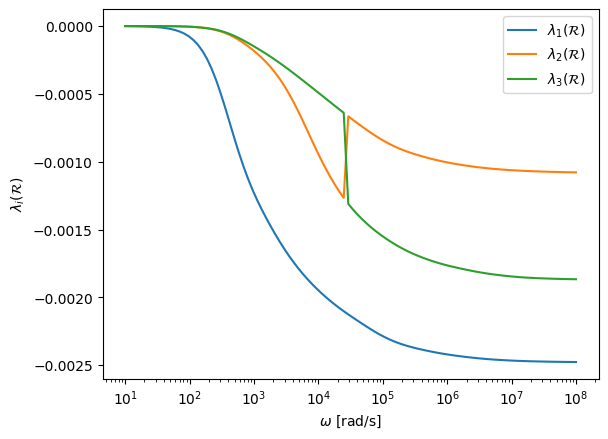

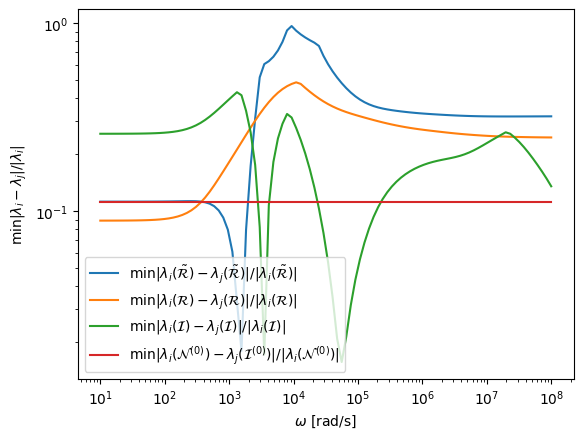

In [3]:
Frequencies=RIResults["Frequencies"]
URstore=RIResults["URstore"]
URtildestore=RIResults["URtildestore"]
UIstore=RIResults["UIstore"]
UN0store=RIResults["UN0store"]


Labels=[r"$\lambda_1(\tilde{\cal R})$",r"$\lambda_2(\tilde{\cal R})$",r"$\lambda_3(\tilde{\cal R})$"]
plt.figure()
for n in range(3):
    plt.semilogx(Frequencies,URtildestore[:,n],label=Labels[n])
plt.legend()
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\lambda_i(\tilde{\cal R})$")
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_eig_Rtilde_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

plt.figure()
Labels=[r"$\lambda_1({\cal I})$",r"$\lambda_2({\cal I})$",r"$\lambda_3({\cal I})$"]
for n in range(3):
    plt.semilogx(Frequencies,UIstore[:,n],label=Labels[n])
plt.legend()
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\lambda_i({\cal I})$")
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_eig_I_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

plt.figure()
Labels=[r"$\lambda_1({\cal R})$",r"$\lambda_2({\cal R})$",r"$\lambda_3({\cal R})$"]
for n in range(3):
    plt.semilogx(Frequencies,URstore[:,n],label=Labels[n])
plt.legend()
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\lambda_i({\cal R})$")
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_eig_R_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()


relmindiffRtilde = np.zeros(len(Frequencies))
relmindiffI = np.zeros(len(Frequencies))
relmindiffR = np.zeros(len(Frequencies))
relmindiffN0 = np.zeros(len(Frequencies))


for n in range(len(Frequencies)):
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(URtildestore[n,m]-URtildestore[n,k])/abs(URtildestore[n,m]) < d:
                d=abs(URtildestore[n,m]-URtildestore[n,k])/abs(URtildestore[n,m])
            if abs(URtildestore[n,m]-URtildestore[n,k])/abs(URtildestore[n,k]) < d:
                d=abs(URtildestore[n,m]-URtildestore[n,k])/abs(URtildestore[n,k])
                
    relmindiffRtilde[n]=d
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(UIstore[n,m]-UIstore[n,k])/abs(UIstore[n,m]) < d:
                d=abs(UIstore[n,m]-UIstore[n,k])/abs(UIstore[n,m]) 
            if abs(UIstore[n,m]-UIstore[n,k])/abs(UIstore[n,k]) < d:
                d=abs(UIstore[n,m]-UIstore[n,k])/abs(UIstore[n,k]) 
    relmindiffI[n]=d
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(URstore[n,m]-URstore[n,k])/abs(URstore[n,m]) < d:
                d=abs(URstore[n,m]-URstore[n,k])/abs(URstore[n,m])
            if abs(URstore[n,m]-URstore[n,k])/abs(URstore[n,k]) < d:
                d=abs(URstore[n,m]-URstore[n,k])/abs(URstore[n,k])
                
    relmindiffR[n]=d
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(UN0store[n,m]-UN0store[n,k])/abs(UN0store[n,m]) < d:
                d=abs(UN0store[n,m]-UN0store[n,k])/abs(UN0store[n,m]) 
            if abs(UN0store[n,m]-UN0store[n,k])/abs(UN0store[n,k]) < d:
                d=abs(UN0store[n,m]-UN0store[n,k])/abs(UN0store[n,k]) 
    relmindiffN0[n]=d
     

    
plt.figure()
plt.loglog(Frequencies,relmindiffRtilde,label=r"$\min |\lambda_i(\tilde{\cal R})-\lambda_j(\tilde{\cal R})|/|\lambda_i(\tilde{\cal R})|$")
plt.loglog(Frequencies,relmindiffR,label=r"$\min |\lambda_i({\cal R})-\lambda_j({\cal R})|/|\lambda_i({\cal R})|$")
plt.loglog(Frequencies,relmindiffI,label=r"$\min |\lambda_i({\cal I})-\lambda_j({\cal I})|/|\lambda_i({\cal I})|$")
plt.loglog(Frequencies,relmindiffN0,label=r"$\min |\lambda_i({\cal N}^{(0)})-\lambda_j({\cal I}^{(0)})|/|\lambda_i({\cal N}^{(0)})|$")
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\min |\lambda_i-\lambda_j|/|\lambda_i|$")
plt.legend()

#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_eig_prox_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

[1.63204191e-17 9.04033748e-16 4.12528679e-14 3.86321968e-13
 2.98226109e-12 3.85764389e-07 2.46256589e-07 1.31948531e-07
 9.32315343e-08 5.77690574e-08 3.45135336e-08 1.77743203e-08
 9.17793237e-09] [1.38043767e-09 2.25920096e-08 4.03526598e-07 2.94690301e-06
 5.14386181e-06 8.01254350e-06 9.69694536e-06 1.05495879e-05
 1.07911446e-05 1.08973214e-05 1.09355280e-05 1.08975296e-05
 1.08712315e-05] [1.38043765e-09 2.25920087e-08 4.03526557e-07 2.94690262e-06
 5.14385882e-06 7.62677911e-06 9.45068877e-06 1.04176393e-05
 1.06979130e-05 1.08395524e-05 1.09010145e-05 1.08797553e-05
 1.08620536e-05]


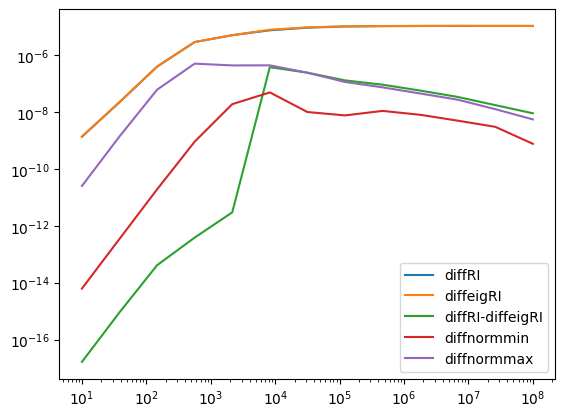

In [10]:
Perm = np.array([[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]])

Frequencies=RIResults["Frequencies"]
URstore=RIResults["URstore"]
URtildestore=RIResults["URtildestore"]
UIstore=RIResults["UIstore"]
UN0store=RIResults["UN0store"]

Rstore=RIResults["Rstore"]
Rtildestore=RIResults["Rtildestore"]
Istore=RIResults["Istore"]
N0store=RIResults["N0store"]


N=len(Frequencies)
diffRI=np.zeros(N)
diffeigRI=np.zeros(N)
diffnormmin=np.zeros(N)
diffnormmax=np.zeros(N)
uR=np.zeros(3)
uI=np.zeros(3)
R=np.zeros((3,3))
I=np.zeros((3,3))
Rtilde=np.zeros((3,3))
N0=np.zeros((3,3))

sorteigenvalues="MaxDifference"
for n in range(N):
    for i in range(3):
        uR[i]=URstore[n,i]
        uI[i]=UIstore[n,i]

        for j in range(3):
            R[i,j]=Rstore[n,i,j]
            I[i,j]=Istore[n,i,j]
            Rtilde[i,j]=Rtildestore[n,i,j]
            N0[i,j]=N0store[n,i,j]
        
            
    if sorteigenvalues=="MinDifference":
            # Find min combination

        diffeig=1e10

    elif sorteigenvalues=="MaxDifference":
            # Find max combination
        diffeig=0.

    for m in range(6):
        mysum=0.
        ind=Perm[m,:]
        for i in range(3):
            mysum = mysum+ (uR[i]-uI[ind[i]-1])**2
        check = False
        if sorteigenvalues=="MinDifference" and mysum < diffeig:
            check = True
        elif sorteigenvalues=="MaxDifference" and mysum > diffeig:
            check = True
        if check==True:
            diffeig = mysum
            puI=np.zeros(3,dtype=np.longdouble)
        #         #S=np.zeros((3,3))
            for i in range(3):
                puI[i]=uI[ind[i]-1]
       
    

    evlist=np.zeros(3)    
    evlist[0]= - (puI[1]-puI[2])*(uR[1]-uR[2])
    evlist[1]= - (puI[0]-puI[2])*(uR[0]-uR[2])
    evlist[2]= - (puI[0]-puI[1])*(uR[0]-uR[1])
    normalisation_min = np.min(np.abs(evlist))
    normalisation_max = np.max(np.abs(evlist))

    Tol=1e-6
    diffRI[n]=np.linalg.norm(R-I,ord='fro')**2
    diffeigRI[n]=diffeig
    diffnormmin[n]=normalisation_min
    diffnormmax[n]=normalisation_max

plt.figure()
plt.loglog(Frequencies,diffRI,label='diffRI')
plt.loglog(Frequencies,diffeigRI,label='diffeigRI')

plt.loglog(Frequencies,np.abs(diffeigRI-diffRI),label='diffRI-diffeigRI')

plt.loglog(Frequencies,diffnormmin,label='diffnormmin')
plt.loglog(Frequencies,diffnormmax,label='diffnormmax')
plt.legend()

print(np.abs(diffeigRI-diffRI),diffeigRI,diffRI)


dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max', 'RIfmeasapprx_den_const_max', 'RIfmeasapprx_den_const_min', 'RIcommeapprx_den_const_max', 'RIcommeapprx_den_const_min', 'URstore', 'UIstore', 'URtildestore', 'UN0store', 'QRstore', 'QIstore', 'QRtildestore', 'QN0store', 'AnglestoreRIfmeasfullconstsortedmindiff', 'AnglestoreRIfmeasfullconstsortedmaxdiff', 'AnglestoreRIcommeasfullconstsortedmindiff', 'AnglestoreRIcommeasfullconstsortedmaxdiff', 'Rstore', 'Istore', 'Rtildestore', 'N0store'])


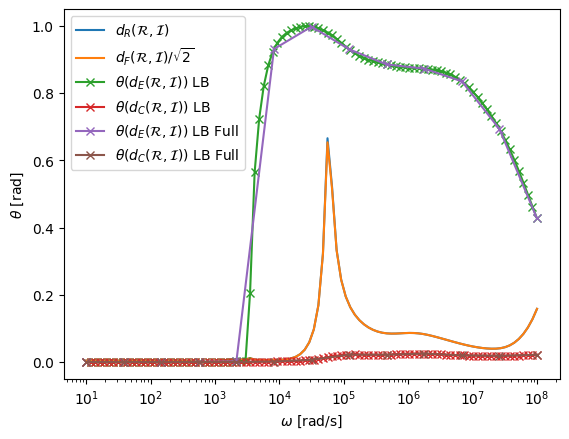

In [7]:
print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmin=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"],
                                                     RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIfmeasapprxconstsortedmax=np.fmax(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"])

AnglestoreRIfmeasapprxconstsortedminFull=np.fmin(RIResultsFull["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"],
                                                     RIResultsFull["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIfmeasapprxconstsortedmaxFull=np.fmax(RIResultsFull["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResultsFull["AnglestoreRIfmeasapprxconstsortedmindiff_max"])


AnglestoreRIcommeasapprxconstsortedmin=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmax=np.fmax(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

AnglestoreRIcommeasapprxconstsortedminFull=np.fmin(RIResultsFull["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"],RIResultsFull["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

FrequenciesFull=RIResultsFull["Frequencies"]



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmin,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ LB')
#plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmindiff_min,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ UB')

plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmin,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ LB')
#plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmindiff_min,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ UB')
plt.semilogx(FrequenciesFull,AnglestoreRIfmeasapprxconstsortedminFull,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ LB Full')
#plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmindiff_min,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ UB')

plt.semilogx(FrequenciesFull,AnglestoreRIcommeasapprxconstsortedminFull,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ LB Full')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RI_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

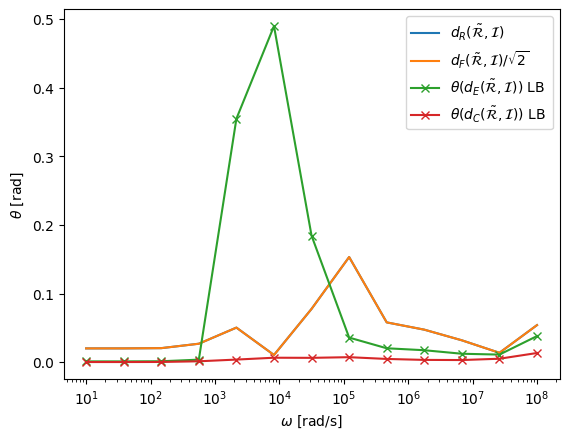

In [6]:

Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]
AnglestoreRtildeIfmeasapprxconstsortedmin=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIfmeasapprxconstsortedmax=np.fmax(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"])

AnglestoreRtildeIcommeasapprxconstsortedmin=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"])
AnglestoreRtildeIcommeasapprxconstsortedmax=np.fmax(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeasapprxconstsortedmin,'-x',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB')

plt.semilogx(Frequencies,AnglestoreRtildeIcommeasapprxconstsortedmin,'-x',label=r'$\theta(d_C(\tilde{\cal R},{\cal I}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.2)
plt.legend()
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RtildeI_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

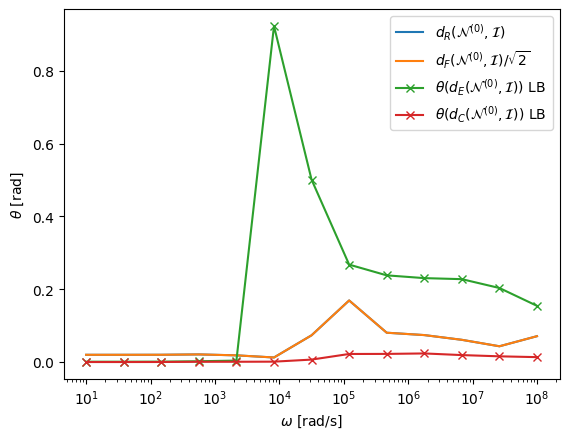

In [7]:

Frequencies=N0IResults["Frequencies"]
MinAnglestoreN0I=N0IResults["MinAnglestoreN0I"]
AnglestoreN0Ifmeasapprxconstsortedmin=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_min"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
AnglestoreN0Ifmeasapprxconstsortedmax=np.fmax(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_max"])

AnglestoreN0Icommeasapprxconstsortedmin=np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_min"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])
AnglestoreN0Icommeasapprxconstsortedmax=np.fmax(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_max"])


dFMinAnglestoreN0I = N0IResults["dFMinAnglestoreN0I"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0I,label=r'$d_R({\cal N}^{(0)},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0I/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Ifmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ LB')

plt.semilogx(Frequencies,AnglestoreN0Icommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,2)
plt.legend()
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0I_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")


plt.show()

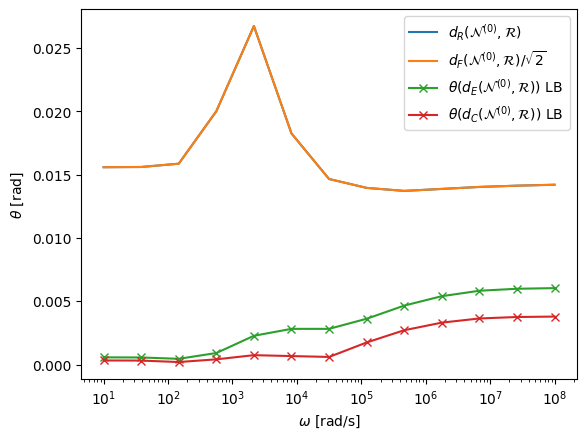

In [8]:
Frequencies=N0RResults["Frequencies"]
MinAnglestoreN0R=N0RResults["MinAnglestoreN0R"]
AnglestoreN0Rfmeasapprxconstsortedmin=np.fmin(N0RResults["AnglestoreN0Rfmeasapprxconstsortedmaxdiff_min"],N0RResults["AnglestoreN0Rfmeasapprxconstsortedmindiff_min"])
AnglestoreN0Rfmeasapprxconstsortedmax=np.fmax(N0RResults["AnglestoreN0Rfmeasapprxconstsortedmaxdiff_max"],N0RResults["AnglestoreN0Rfmeasapprxconstsortedmindiff_max"])

AnglestoreN0Rcommeasapprxconstsortedmin=np.fmin(N0RResults["AnglestoreN0Rcommeasapprxconstsortedmaxdiff_min"],N0RResults["AnglestoreN0Rcommeasapprxconstsortedmindiff_min"])
AnglestoreN0Rcommeasapprxconstsortedmax=np.fmax(N0RResults["AnglestoreN0Rcommeasapprxconstsortedmaxdiff_max"],N0RResults["AnglestoreN0Rcommeasapprxconstsortedmindiff_max"])


dFMinAnglestoreN0R = N0RResults["dFMinAnglestoreN0R"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0R,label=r'$d_R({\cal N}^{(0)},{\cal R})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0R/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal R})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Rfmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal R}))$ LB')

plt.semilogx(Frequencies,AnglestoreN0Rcommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal R}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.5)
plt.legend()
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0R_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")


plt.show()

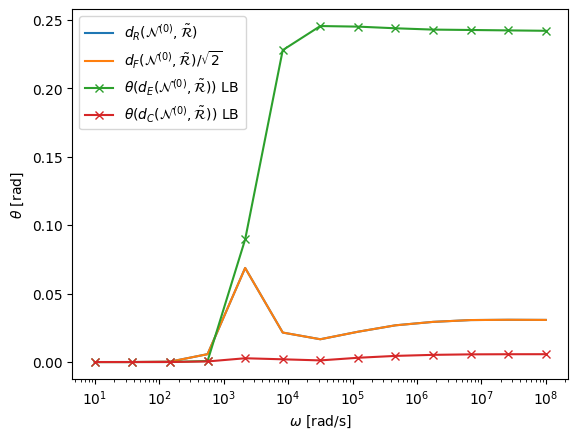

In [9]:
Frequencies=N0RtildeResults["Frequencies"]
MinAnglestoreN0Rtilde=N0RtildeResults["MinAnglestoreN0Rtilde"]
AnglestoreN0Rtildefmeasapprxconstsortedmin=np.fmin(N0RtildeResults["AnglestoreN0Rtildefmeasapprxconstsortedmaxdiff_min"],N0RtildeResults["AnglestoreN0Rtildefmeasapprxconstsortedmindiff_min"])
AnglestoreN0Rtildefmeasapprxconstsortedmax=np.fmax(N0RtildeResults["AnglestoreN0Rtildefmeasapprxconstsortedmaxdiff_max"],N0RtildeResults["AnglestoreN0Rtildefmeasapprxconstsortedmindiff_max"])

AnglestoreN0Rtildecommeasapprxconstsortedmin=np.fmin(N0RtildeResults["AnglestoreN0Rtildecommeasapprxconstsortedmaxdiff_min"],N0RtildeResults["AnglestoreN0Rtildecommeasapprxconstsortedmindiff_min"])
AnglestoreN0Rtildecommeasapprxconstsortedmax=np.fmax(N0RtildeResults["AnglestoreN0Rtildecommeasapprxconstsortedmaxdiff_max"],N0RtildeResults["AnglestoreN0Rtildecommeasapprxconstsortedmindiff_max"])


dFMinAnglestoreN0Rtilde = N0RtildeResults["dFMinAnglestoreN0Rtilde"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0Rtilde,label=r'$d_R({\cal N}^{(0)},\tilde{\cal R})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0Rtilde/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},\tilde{\cal R})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Rtildefmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E({\cal N}^{(0)},\tilde{\cal R}))$ LB')

plt.semilogx(Frequencies,AnglestoreN0Rtildecommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C({\cal N}^{(0)},\tilde{\cal R}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.5)
plt.legend()
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0Rtilde_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")


plt.show()

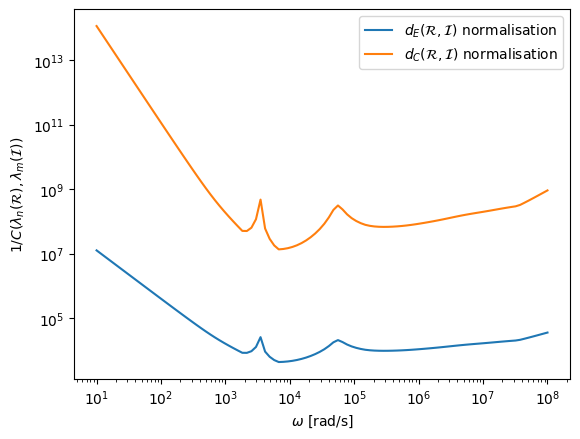

In [9]:
Frequencies=RIResults["Frequencies"]
RIcommeapprx_den_const=np.fmin(RIResults["RIcommeapprx_den_const_max"],RIResults["RIcommeapprx_den_const_min"])
RIfmeasapprx_den_const=np.fmin(RIResults["RIfmeasapprx_den_const_max"],RIResults["RIfmeasapprx_den_const_min"])



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.loglog(Frequencies,1/RIfmeasapprx_den_const,label=r'$d_E({\cal R},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/RIcommeapprx_den_const,label=r'$d_C({\cal R},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n({\cal R}),\lambda_m({\cal I}))$')
plt.legend()
#plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RI_den_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

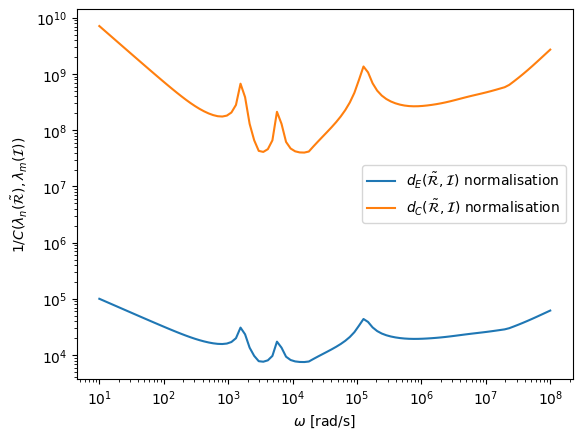

In [9]:
Frequencies=RtildeIResults["Frequencies"]
RtildeIcommeapprx_den_const=np.fmin(RtildeIResults["RtildeIcommeapprx_den_const_max"],RtildeIResults["RtildeIcommeapprx_den_const_min"])
RtildeIfmeasapprx_den_const=np.fmin(RtildeIResults["RtildeIfmeasapprx_den_const_max"],RtildeIResults["RtildeIfmeasapprx_den_const_min"])

fig=plt.figure()
plt.loglog(Frequencies,1/RtildeIfmeasapprx_den_const,label=r'$d_E(\tilde{\cal R},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/RtildeIcommeapprx_den_const,label=r'$d_C(\tilde{\cal R},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n(\tilde{\cal R}),\lambda_m({\cal I}))$')
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_Rtilde0I_den_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

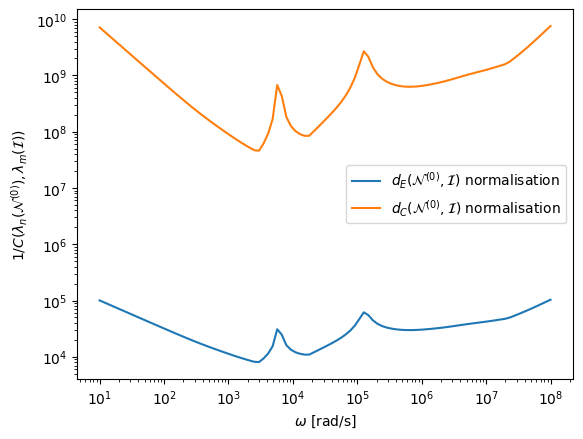

In [10]:
Frequencies=RIResults["Frequencies"]
N0Icommeapprx_den_const=np.fmin(N0IResults["N0Icommeapprx_den_const_max"],N0IResults["N0Icommeapprx_den_const_min"])
N0Ifmeasapprx_den_const=np.fmin(N0IResults["N0Ifmeasapprx_den_const_max"],N0IResults["N0Ifmeasapprx_den_const_min"])

fig=plt.figure()
plt.loglog(Frequencies,1/N0Ifmeasapprx_den_const,label=r'$d_E({\cal N}^{(0)},{\cal I})$ normalisation')
plt.loglog(Frequencies,1/N0Icommeapprx_den_const,label=r'$d_C({\cal N}^{(0)},{\cal I})$ normalisation')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$1/C(\lambda_n({\cal N}^{(0)}),\lambda_m({\cal I}))$')
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0I_den_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()